<a href="https://colab.research.google.com/github/Ganesh7134/Bank-cusomer-churn-prediction/blob/main/Bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**What is customer churning**
Customer churn, also known as customer attrition, is **the number of customers who stop using a business's products or services during a given period of time**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info() # dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe() # statistical info

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Multi-collinearity** : If two or more independent variables having an exact linear relationship between them then it is perfect collinearity

###**Addressing Multicollinearity**:

* **Remove a Variable**: If one variable is clearly redundant (e.g., bedrooms can be dropped if highly correlated with sqft), removing it can alleviate the issue. However, domain knowledge is crucial to ensure the removed variable isn't actually informative.
* **Combine Variables**: If two variables represent the same underlying concept (e.g., sqft per bedroom), creating a new variable (e.g., average bedroom size) might be helpful.
* **Regularization Techniques**: Some machine learning algorithms incorporate regularization penalties that can help reduce the impact of multicollinearity.

>By understanding multicollinearity and taking steps to address it, you can ensure your regression model is more reliable and provides more accurate insights into the relationships between variables.

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [ ]:
data = pd.get_dummies(data=df,drop_first=True)

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<Axes: ylabel='Frequency'>

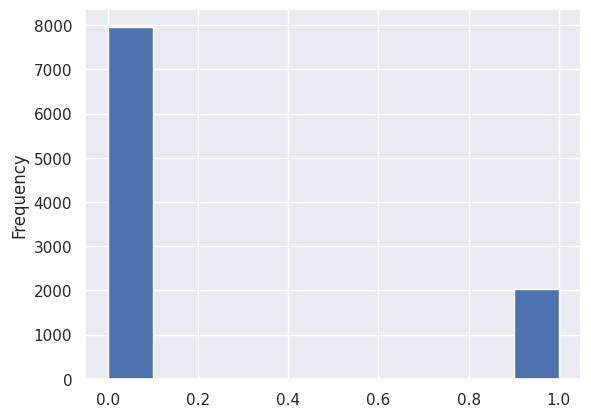

In [ ]:
df.Exited.plot(kind="hist") # almost 8000 people are staying with the company people left from the company are 2000

In [ ]:
(data["Exited"]==0).sum()

7963

In [ ]:
(data["Exited"]==1).sum()

2037

In [ ]:
data2 = data.drop(columns=["Exited"]) # containing all the columns except Exited because that is our target variable

<Axes: title={'center': 'correlated tith Exited column'}>

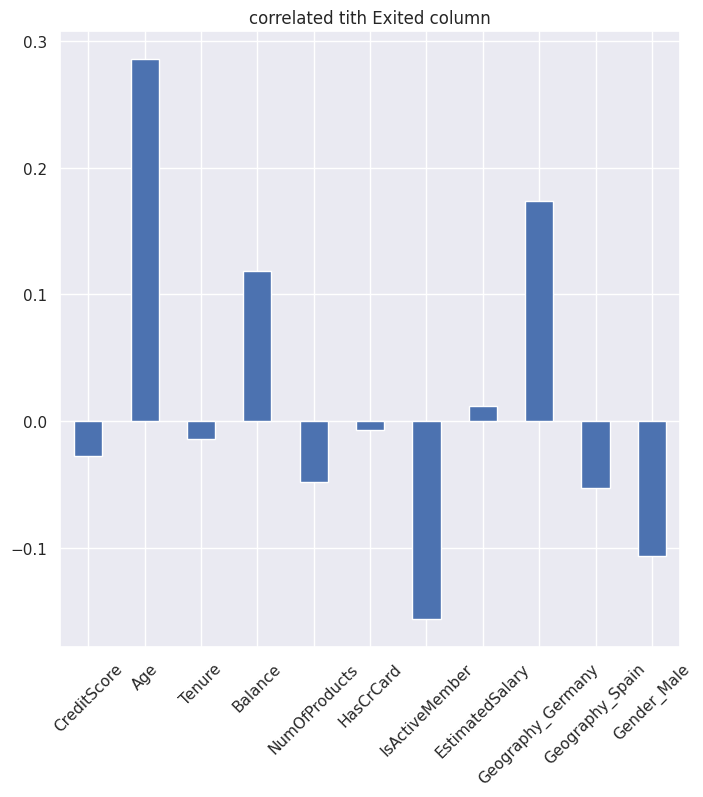

In [ ]:
data2.corrwith(data["Exited"]).plot.bar(figsize=(8,8),title="correlated tith Exited column",rot=45,grid=True)

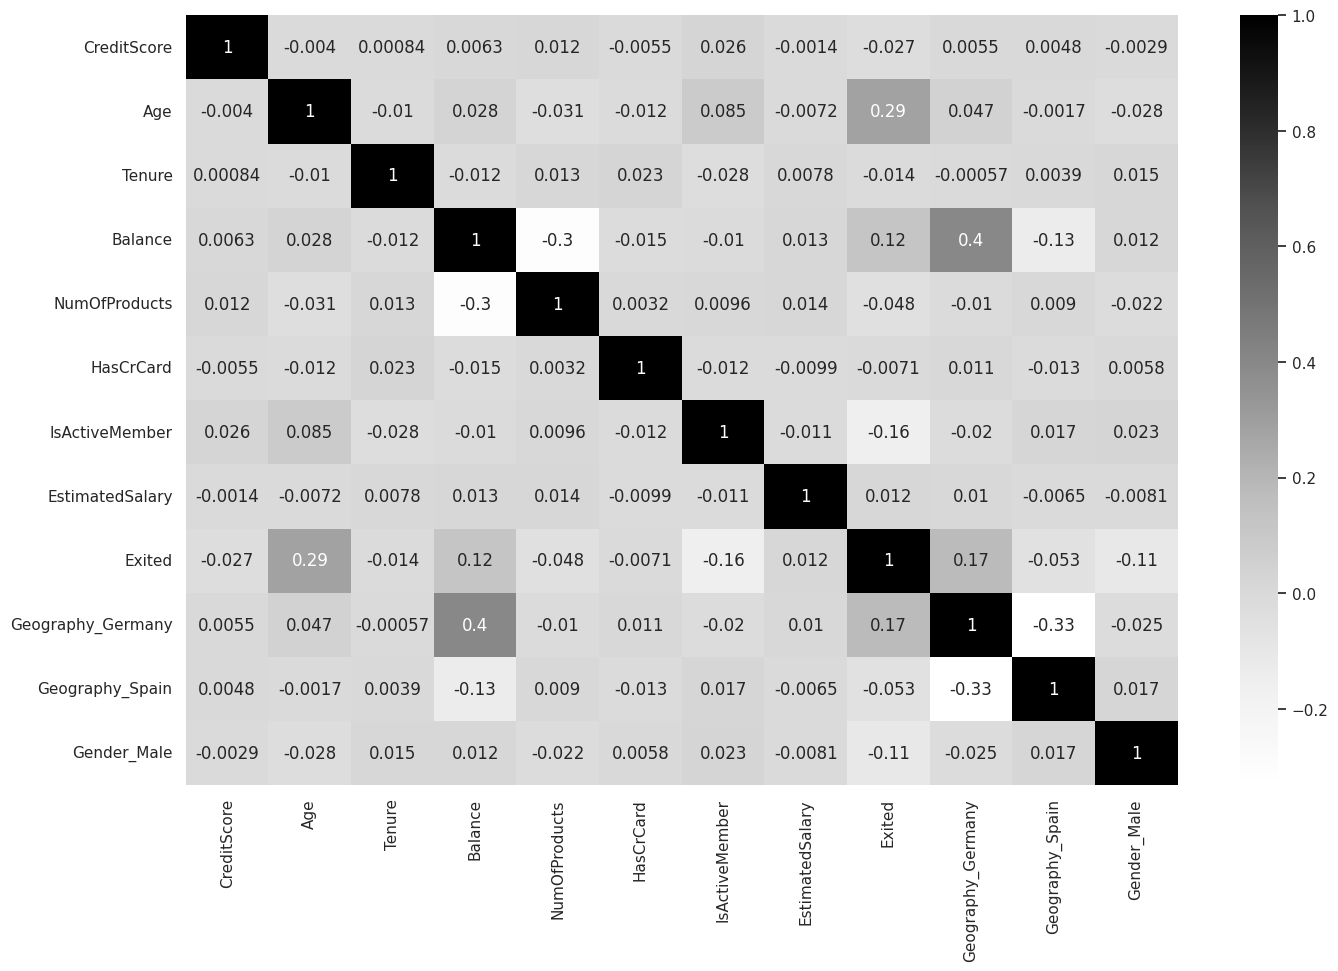

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Greys")
plt.show()

In [ ]:
x = data.drop(columns=["Exited"])
y = data["Exited"]

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

Understanding fit and transform in Scikit-learn Transformers

* **fit**: This method is used to learn the parameters of a transformer based on the training data. In the case of StandardScaler, it calculates the mean and standard deviation of each feature in the training data (x_train). These parameters are essential for transforming the data to a standardized scale.
* **transform**: Once a transformer is fitted (has learned its parameters), this method is used to apply the learned transformation to new data. It uses the parameters learned from fit to transform the input data.

Here's a breakdown of why separate calls are important:

* **Training Data Learns the Distribution**: The fit method on x_train helps the scaler understand the distribution of the features in the training data. This includes calculating the mean and standard deviation for each feature.
* **Test Data Uses Learned Parameters**: The transform method on x_test uses the parameters learned from fit on x_train (mean and standard deviation) to transform the test data. It doesn't re-calculate these parameters on the test data itself.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

Logistic regression is a supervised learning algorithm **that estimates the probability of a binary outcome using a logistic function**.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1).fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix

pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
con = confusion_matrix(y_test,y_pred)

In [ ]:
metric = pd.DataFrame([["Logistic_regression",acc,f1,pre,rec]],columns=["model","accuracy_score","f1_score","precision","recall"])

In [ ]:
metric

,model,accuracy_score,f1_score,precision,recall
0,Logistic_regression,0.8125,0.329159,0.638889,0.221687


In [ ]:
con

array([[1533,   52],
       [ 323,   92]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1).fit(x_train,y_train)
y_pred = clf.predict(x_test)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
con = confusion_matrix(y_test,y_pred)
rfc = pd.DataFrame([["Random_forest_classifier",acc,f1,pre,rec]],columns=["model","accuracy_score","f1_score","precision","recall"])
metric.append(rfc,ignore_index=True)

<ipython-input-72-037ea0c66187>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric.append(rfc,ignore_index=True)


,model,accuracy_score,f1_score,precision,recall
0,Logistic_regression,0.8125,0.329159,0.638889,0.221687
1,Random_forest_classifier,0.8605,0.572741,0.785714,0.450602


In [ ]:
con

array([[1534,   51],
       [ 228,  187]])

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
obs = [[680,40,3,88900.90,2,0,1,11000.90,1,0,1]] # if we change No.of products then we can see the output of 1
clf.predict(scaler.transform(obs)) # 0 means those are staying in the company
# 1 means those are exited from the company

array([0])